In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option("max_columns",50)
mpl.rcParams["lines.linewidth"]=2

%matplotlib inline

In [2]:
columns_1=["orderid","userid","ispaid","price","paidtime"]
df=pd.read_csv("order_info_utf.csv",names=columns_1,sep=",")
df

,orderid,userid,ispaid,price,paidtime
0,1,11211,已支付,833.0000,2016/03/01 00:04:00
1,2,11211,已支付,487.0000,2016/03/01 00:03:00
2,3,11211,未支付,794.0000,NaN
3,4,74553,已支付,737.0000,2016/03/01 00:02:00
4,5,37799,已支付,647.0000,2016/03/01 00:01:00
5,6,11211,已支付,1200.0000,2016/03/01 00:04:00
6,7,11211,已支付,470.0000,2016/03/01 00:04:00
7,8,13341,已支付,890.7000,2016/03/01 00:06:00
8,9,11211,已支付,538.0000,2016/03/01 00:04:00
9,10,11211,已支付,749.0000,2016/03/01 00:04:00


本次分析目的：
获得用户的月留存率

- 字段解释：

orderid - 订单id，无重复

userid - 用户id，有重复

ispaid - 是否支付，分已支付、未支付，本次研究已支付部分

paidtime - 支付时间

## 一、数据清洗

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539414 entries, 0 to 539413
Data columns (total 5 columns):
orderid     539414 non-null int64
userid      539414 non-null int64
ispaid      539414 non-null object
price       539414 non-null float64
paidtime    461805 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 20.6+ MB


In [4]:
(df.shape[0]-df.count())/df.shape[0] #paidtime存在空值

orderid     0.000000
userid      0.000000
ispaid      0.000000
price       0.000000
paidtime    0.143877
dtype: float64

In [5]:
print(df["paidtime"].unique())

['2016/03/01 00:04:00' '2016/03/01 00:03:00' nan ... '2016/05/01 00:00:00'
 '2016/04/30 23:58:00' '2016/05/01 00:05:00']


### 1.1  Paidtime剔除空值影响

In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
(df.shape[0]-df.count())/df.shape[0] #空值成功清除

orderid     0.0
userid      0.0
ispaid      0.0
price       0.0
paidtime    0.0
dtype: float64

### 1.2 剔除isPaid未支付

In [8]:
df["ispaid"].value_counts() #删除Paidtime空值时便已清理未支付部分

已支付    461805
Name: ispaid, dtype: int64

### 1.3 建立新字段OrderPeriod
因为我们是在做周度群组，所以我们会关注用户的周度行为。

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461805 entries, 0 to 539413
Data columns (total 5 columns):
orderid     461805 non-null int64
userid      461805 non-null int64
ispaid      461805 non-null object
price       461805 non-null float64
paidtime    461805 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 21.1+ MB


In [10]:
df["paidtime"]=pd.to_datetime(df.paidtime)

In [11]:
df["OrderPeriod"]=df["paidtime"]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461805 entries, 0 to 539413
Data columns (total 6 columns):
orderid        461805 non-null int64
userid         461805 non-null int64
ispaid         461805 non-null object
price          461805 non-null float64
paidtime       461805 non-null datetime64[ns]
OrderPeriod    461805 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 24.7+ MB


In [13]:
df=df.set_index("OrderPeriod")

In [14]:
df=df.to_period("W").reset_index()

In [15]:
df.head()

,OrderPeriod,orderid,userid,ispaid,price,paidtime
0,2016-02-29/2016-03-06,1,11211,已支付,833.0,2016-03-01 00:04:00
1,2016-02-29/2016-03-06,2,11211,已支付,487.0,2016-03-01 00:03:00
2,2016-02-29/2016-03-06,4,74553,已支付,737.0,2016-03-01 00:02:00
3,2016-02-29/2016-03-06,5,37799,已支付,647.0,2016-03-01 00:01:00
4,2016-02-29/2016-03-06,6,11211,已支付,1200.0,2016-03-01 00:04:00


## 二、数据处理

### 2.1 创建一个名为CohortGroup的新列，它是用户第一次购买的时间区段。

In [16]:
df.set_index("userid",inplace=True)

In [17]:
df["CohortGroup"]=df.groupby(level=0)['OrderPeriod'].min()
df.reset_index(inplace=True)

In [18]:
df

,userid,OrderPeriod,orderid,ispaid,price,paidtime,CohortGroup
0,11211,2016-02-29/2016-03-06,1,已支付,833.0000,2016-03-01 00:04:00,2016-02-29/2016-03-06
1,11211,2016-02-29/2016-03-06,2,已支付,487.0000,2016-03-01 00:03:00,2016-02-29/2016-03-06
2,74553,2016-02-29/2016-03-06,4,已支付,737.0000,2016-03-01 00:02:00,2016-02-29/2016-03-06
3,37799,2016-02-29/2016-03-06,5,已支付,647.0000,2016-03-01 00:01:00,2016-02-29/2016-03-06
4,11211,2016-02-29/2016-03-06,6,已支付,1200.0000,2016-03-01 00:04:00,2016-02-29/2016-03-06
5,11211,2016-02-29/2016-03-06,7,已支付,470.0000,2016-03-01 00:04:00,2016-02-29/2016-03-06
6,13341,2016-02-29/2016-03-06,8,已支付,890.7000,2016-03-01 00:06:00,2016-02-29/2016-03-06
7,11211,2016-02-29/2016-03-06,9,已支付,538.0000,2016-03-01 00:04:00,2016-02-29/2016-03-06
8,11211,2016-02-29/2016-03-06,10,已支付,749.0000,2016-03-01 00:04:00,2016-02-29/2016-03-06
9,11211,2016-02-29/2016-03-06,11,已支付,727.0000,2016-03-01 00:04:00,2016-02-29/2016-03-06


### 2.2 按first_month 及 paidmonth 汇总数据，查看每个月第一次购买的总用户人数

In [19]:
grouped = df.groupby(["CohortGroup","OrderPeriod"])

In [20]:
cohorts = grouped.agg({'userid': pd.Series.nunique,
                       'orderid': pd.Series.nunique,
                       'price': np.sum})
cohorts.rename(columns={'userid': 'TotalUsers',
                        'orderid': 'TotalOrders'}, inplace=True)
cohorts

TotalUsers  TotalOrders  \
CohortGroup           OrderPeriod                                      
2016-02-29/2016-03-06 2016-02-29/2016-03-06       11468        41242   
                      2016-03-07/2016-03-13        1131        35748   
                      2016-03-14/2016-03-20         945        37664   
                      2016-03-21/2016-03-27        1729        40530   
                      2016-03-28/2016-04-03         706        36769   
                      2016-04-04/2016-04-10        1547        40722   
                      2016-04-11/2016-04-17         659        42207   
                      2016-04-18/2016-04-24         596        41123   
                      2016-04-25/2016-05-01         450        30993   
2016-03-07/2016-03-13 2016-03-07/2016-03-13       13261        16441   
                      2016-03-14/2016-03-20        1020         1323   
                      2016-03-21/2016-03-27        1691         1969   
                      2016-03-28/2016-04-03        1288         1493   
                      2016-04-04/2016-04-10         745          996   
                      2016-04-11/2016-04-17        1208         1387   
                      2016-04-18/2016-04-24         999         1197   
                      2016-04-25/2016-05-01         376          484   
2016-03-14/2016-03-20 2016-03-14/2016-03-20       12935        15258   
                      2016-03-21/2016-03-27         827         1047   
                      2016-03-28/2016-04-03        2431         2626   
                      2016-04-04/2016-04-10         600          769   
                      2016-04-11/2016-04-17         452          588   
                      2016-04-18/2016-04-24         816          963   
                      2016-04-25/2016-05-01        1122         1220   
2016-03-21/2016-03-27 2016-03-21/2016-03-27       10974        13184   
                      2016-03-28/2016-04-03         702          842   
                      2016-04-04/2016-04-10        1238         1373   
                      2016-04-11/2016-04-17         787          899   
                      2016-04-18/2016-04-24         342          447   
                      2016-04-25/2016-05-01         270          326   
                      2016-05-02/2016-05-08           1            1   
2016-03-28/2016-04-03 2016-03-28/2016-04-03        9535        11398   
                      2016-04-04/2016-04-10         584          692   
                      2016-04-11/2016-04-17         402          489   
                      2016-04-18/2016-04-24         712          808   
                      2016-04-25/2016-05-01         510          583   
2016-04-04/2016-04-10 2016-04-04/2016-04-10        8368        10203   
                      2016-04-11/2016-04-17         544          670   
                      2016-04-18/2016-04-24         360          428   
                      2016-04-25/2016-05-01         240          296   
2016-04-11/2016-04-17 2016-04-11/2016-04-17        7201         8737   
                      2016-04-18/2016-04-24         475          591   
                      2016-04-25/2016-05-01         246          393   
2016-04-18/2016-04-24 2016-04-18/2016-04-24        6605         7916   
                      2016-04-25/2016-05-01         359          438   
2016-04-25/2016-05-01 2016-04-25/2016-05-01        5302         6332   

                                                    price  
CohortGroup           OrderPeriod                          
2016-02-29/2016-03-06 2016-02-29/2016-03-06  2.660222e+07  
                      2016-03-07/2016-03-13  2.454629e+07  
                      2016-03-14/2016-03-20  2.664184e+07  
                      2016-03-21/2016-03-27  2.899870e+07  
                      2016-03-28/2016-04-03  2.630244e+07  
                      2016-04-04/2016-04-10  2.869627e+07  
                      2016-04-11/2016-04-17  3.131305e+07  
                      2016-04-18/2016-04-24  3.1

### 2.3 为每个CohortGroup标记CohortPeriod
我们想要查看每个队列在他们第一次购买后的几个月内的表现，因此我们需要将每个队列与他们的第一次购买的月份建立索引。例如，CohortPeriod = 1是队列的第一个时间段，CohortPeriod = 2是第二个时间段，以此类推。

In [21]:
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

In [22]:
cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts

TotalUsers  TotalOrders  \
CohortGroup           OrderPeriod                                      
2016-02-29/2016-03-06 2016-02-29/2016-03-06       11468        41242   
                      2016-03-07/2016-03-13        1131        35748   
                      2016-03-14/2016-03-20         945        37664   
                      2016-03-21/2016-03-27        1729        40530   
                      2016-03-28/2016-04-03         706        36769   
                      2016-04-04/2016-04-10        1547        40722   
                      2016-04-11/2016-04-17         659        42207   
                      2016-04-18/2016-04-24         596        41123   
                      2016-04-25/2016-05-01         450        30993   
2016-03-07/2016-03-13 2016-03-07/2016-03-13       13261        16441   
                      2016-03-14/2016-03-20        1020         1323   
                      2016-03-21/2016-03-27        1691         1969   
                      2016-03-28/2016-04-03        1288         1493   
                      2016-04-04/2016-04-10         745          996   
                      2016-04-11/2016-04-17        1208         1387   
                      2016-04-18/2016-04-24         999         1197   
                      2016-04-25/2016-05-01         376          484   
2016-03-14/2016-03-20 2016-03-14/2016-03-20       12935        15258   
                      2016-03-21/2016-03-27         827         1047   
                      2016-03-28/2016-04-03        2431         2626   
                      2016-04-04/2016-04-10         600          769   
                      2016-04-11/2016-04-17         452          588   
                      2016-04-18/2016-04-24         816          963   
                      2016-04-25/2016-05-01        1122         1220   
2016-03-21/2016-03-27 2016-03-21/2016-03-27       10974        13184   
                      2016-03-28/2016-04-03         702          842   
                      2016-04-04/2016-04-10        1238         1373   
                      2016-04-11/2016-04-17         787          899   
                      2016-04-18/2016-04-24         342          447   
                      2016-04-25/2016-05-01         270          326   
                      2016-05-02/2016-05-08           1            1   
2016-03-28/2016-04-03 2016-03-28/2016-04-03        9535        11398   
                      2016-04-04/2016-04-10         584          692   
                      2016-04-11/2016-04-17         402          489   
                      2016-04-18/2016-04-24         712          808   
                      2016-04-25/2016-05-01         510          583   
2016-04-04/2016-04-10 2016-04-04/2016-04-10        8368        10203   
                      2016-04-11/2016-04-17         544          670   
                      2016-04-18/2016-04-24         360          428   
                      2016-04-25/2016-05-01         240          296   
2016-04-11/2016-04-17 2016-04-11/2016-04-17        7201         8737   
                      2016-04-18/2016-04-24         475          591   
                      2016-04-25/2016-05-01         246          393   
2016-04-18/2016-04-24 2016-04-18/2016-04-24        6605         7916   
                      2016-04-25/2016-05-01         359          438   
2016-04-25/2016-05-01 2016-04-25/2016-05-01        5302         6332   

                                                    price  CohortPeriod  
CohortGroup           OrderPeriod                                        
2016-02-29/2016-03-06 2016-02-29/2016-03-06  2.660222e+07             1  
                      2016-03-07/2016-03-13  2.454629e+07             2  
                      2016-03-14/2016-03-20  2.664184e+07             3  
                      2016-03-21/2016-03-27  2.899870e+07             4  
                      2016-03-28/2016-04-03  2.630244e+07             5  
                      2016-04-04/2016-04-10  2.869627e+07             

### 2.4用户保留按群组分组
我们想要查看每组随时间变化的百分比，而不是绝对变化。

为此，我们首先需要创建一个包含每个CohortGroup及其大小的panda系列

In [23]:
cohorts.reset_index(inplace=True)

In [24]:
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

In [25]:
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first() #每个月份第一次的用户总数
cohort_group_size.head()

CohortGroup
2016-02-29/2016-03-06    11468
2016-03-07/2016-03-13    13261
2016-03-14/2016-03-20    12935
2016-03-21/2016-03-27    10974
2016-03-28/2016-04-03     9535
Freq: W-SUN, Name: TotalUsers, dtype: int64

现在，我们需要用cohort_group_size除以以cohort_group_size为单位的TotalUsers值。由于DataFrame操作是基于对象的索引执行的，所以我们将在我们的组DataFrame上使用unstack来创建一个矩阵，其中每一列表示一个CohortGroup，每一行表示对应于该组的CohortPeriod。

为了说明unstack的作用，请回忆一下前五个TotalUsers值:

In [26]:
cohorts

OrderPeriod  TotalUsers  \
CohortGroup           CohortPeriod                                      
2016-02-29/2016-03-06 1             2016-02-29/2016-03-06       11468   
                      2             2016-03-07/2016-03-13        1131   
                      3             2016-03-14/2016-03-20         945   
                      4             2016-03-21/2016-03-27        1729   
                      5             2016-03-28/2016-04-03         706   
                      6             2016-04-04/2016-04-10        1547   
                      7             2016-04-11/2016-04-17         659   
                      8             2016-04-18/2016-04-24         596   
                      9             2016-04-25/2016-05-01         450   
2016-03-07/2016-03-13 1             2016-03-07/2016-03-13       13261   
                      2             2016-03-14/2016-03-20        1020   
                      3             2016-03-21/2016-03-27        1691   
                      4             2016-03-28/2016-04-03        1288   
                      5             2016-04-04/2016-04-10         745   
                      6             2016-04-11/2016-04-17        1208   
                      7             2016-04-18/2016-04-24         999   
                      8             2016-04-25/2016-05-01         376   
2016-03-14/2016-03-20 1             2016-03-14/2016-03-20       12935   
                      2             2016-03-21/2016-03-27         827   
                      3             2016-03-28/2016-04-03        2431   
                      4             2016-04-04/2016-04-10         600   
                      5             2016-04-11/2016-04-17         452   
                      6             2016-04-18/2016-04-24         816   
                      7             2016-04-25/2016-05-01        1122   
2016-03-21/2016-03-27 1             2016-03-21/2016-03-27       10974   
                      2             2016-03-28/2016-04-03         702   
                      3             2016-04-04/2016-04-10        1238   
                      4             2016-04-11/2016-04-17         787   
                      5             2016-04-18/2016-04-24         342   
                      6             2016-04-25/2016-05-01         270   
                      7             2016-05-02/2016-05-08           1   
2016-03-28/2016-04-03 1             2016-03-28/2016-04-03        9535   
                      2             2016-04-04/2016-04-10         584   
                      3             2016-04-11/2016-04-17         402   
                      4             2016-04-18/2016-04-24         712   
                      5             2016-04-25/2016-05-01         510   
2016-04-04/2016-04-10 1             2016-04-04/2016-04-10        8368   
                      2             2016-04-11/2016-04-17         544   
                      3             2016-04-18/2016-04-24         360   
                      4             2016-04-25/2016-05-01         240   
2016-04-11/2016-04-17 1             2016-04-11/2016-04-17        7201   
                      2             2016-04-18/2016-04-24         475   
                      3             2016-04-25/2016-05-01         246   
2016-04-18/2016-04-24 1             2016-04-18/2016-04-24        6605   
                      2             2016-04-25/2016-05-01         359   
2016-04-25/2016-05-01 1             2016-04-25/2016-05-01        5302   

                                    TotalOrders         price  
CohortGroup           CohortPeriod                             
2016-02-29/2016-03-06 1                   41242  2.660222e+07  
                      2                   35748  2.454629e+07  
                      3                   37664  2.664184e+07  
                      4                   40530  2.899870e+07  
                      5                   36769  2.630244e+07  
                      6                   40722  2.869627e+07  
                      7      

In [27]:
cohorts['TotalUsers'].unstack(0).head()

CohortGroup,2016-02-29/2016-03-06,2016-03-07/2016-03-13,2016-03-14/2016-03-20,2016-03-21/2016-03-27,2016-03-28/2016-04-03,2016-04-04/2016-04-10,2016-04-11/2016-04-17,2016-04-18/2016-04-24,2016-04-25/2016-05-01
CohortPeriod,,,,,,,,,
1,11468.0,13261.0,12935.0,10974.0,9535.0,8368.0,7201.0,6605.0,5302.0
2,1131.0,1020.0,827.0,702.0,584.0,544.0,475.0,359.0,NaN
3,945.0,1691.0,2431.0,1238.0,402.0,360.0,246.0,NaN,NaN
4,1729.0,1288.0,600.0,787.0,712.0,240.0,NaN,NaN,NaN
5,706.0,745.0,452.0,342.0,510.0,NaN,NaN,NaN,NaN


In [28]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head()

CohortGroup,2016-02-29/2016-03-06,2016-03-07/2016-03-13,2016-03-14/2016-03-20,2016-03-21/2016-03-27,2016-03-28/2016-04-03,2016-04-04/2016-04-10,2016-04-11/2016-04-17,2016-04-18/2016-04-24,2016-04-25/2016-05-01
CohortPeriod,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.098622,0.076917,0.063935,0.063969,0.061248,0.065010,0.065963,0.054353,NaN
3,0.082403,0.127517,0.187940,0.112812,0.042160,0.043021,0.034162,NaN,NaN
4,0.150767,0.097127,0.046386,0.071715,0.074672,0.028681,NaN,NaN,NaN
5,0.061563,0.056180,0.034944,0.031165,0.053487,NaN,NaN,NaN,NaN


## 三、最后，我们可以绘制随时间变化的队列，以发现行为上的差异或相似之处。
两种常见的队列图是线图和热力图，如下图所示。

请注意，每个队列的第一阶段是100%——这是因为我们的队列基于每个用户的第一次购买，也就是说队列中的每个人都是在第一个时间段购买的。

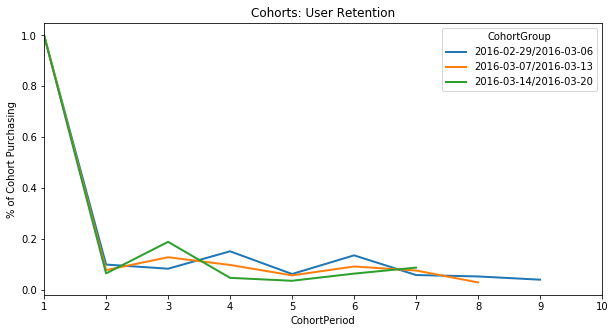

In [31]:
user_retention[[user_retention.columns[0],user_retention.columns[1],user_retention.columns[2]]].plot(figsize=(10,5))
plt.title('Cohorts: User Retention') #标题
plt.xticks(np.arange(1, 10.1, 1)) #x轴的标号
plt.xlim(1, 10) #x轴限制
plt.ylabel('% of Cohort Purchasing'); #y标签

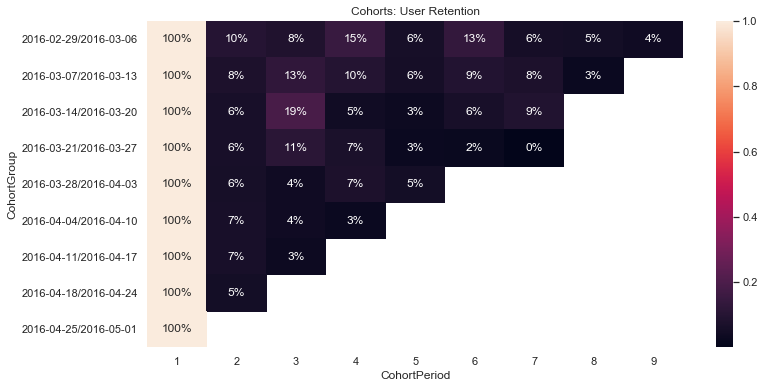

In [32]:
import seaborn as sns
sns.set(style="white") #底色为白色

plt.figure(figsize=(12, 6))  #显示的长宽大小
plt.title('Cohorts: User Retention') #标题
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%'); 
#转置数据，mask 马赛克，遮蔽掉空值（默认遮蔽空值），annot关键字参数，就是里面的百分比，fmt换算显示单位由0.1变为10%